In [1]:
from pypylon import pylon

In [2]:
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

In [3]:
# set gain
camera.GainAuto.SetValue("Off")

In [4]:
camera.Gain.SetValue(12)

In [5]:
# Test exposure time
camera.ExposureAuto.SetValue("Off")

In [6]:
camera.ExposureTime.SetValue(2000)

In [7]:
# demonstrate some feature accessdi.SetSerialNumber("2134234")
new_width = camera.Width.GetValue() - camera.Width.GetInc()
if new_width >= camera.Width.GetMin():
    camera.Width.SetValue(new_width)

In [8]:
numberOfImagesToGrab = 5
camera.StartGrabbingMax(numberOfImagesToGrab)

In [9]:
while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

    grabResult.Release()
camera.Close()

SizeX:  1264
SizeY:  1024
Gray value of first pixel:  5
SizeX:  1264
SizeY:  1024
Gray value of first pixel:  5
SizeX:  1264
SizeY:  1024
Gray value of first pixel:  2
SizeX:  1264
SizeY:  1024
Gray value of first pixel:  5
SizeX:  1264
SizeY:  1024
Gray value of first pixel:  3


In [10]:
import matplotlib.pyplot as plt

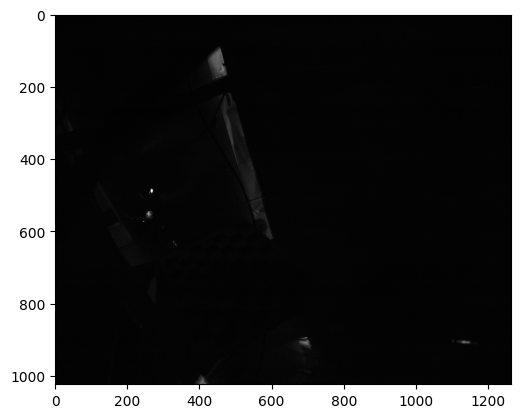

In [11]:
plt.imshow(img, cmap = plt.cm.Greys_r)

In [12]:
camera.Close()
